In [3]:
import onnxruntime as ort
import numpy as np
import torch

# Check run model

In [4]:
model_path = '/home/max/ieos/small_obj/vid_pred/rt-detr.onnx'
session = ort.InferenceSession(model_path)

In [5]:
in_img = session.get_inputs()[0].name
in_shape = session.get_inputs()[1].name

In [6]:
input_data = np.random.randn(1,3,224,224).astype(np.float32)

In [7]:
outputs = session.run(None, {in_img:input_data, in_shape:np.array([[224,224]])})

In [8]:
len(outputs)

3

In [9]:
outputs[0]

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 

In [10]:
outputs[1].shape

(1, 300, 4)

In [11]:
print(outputs[2].shape)
print(outputs[2])

(1, 300)
[[0.45040187 0.35101077 0.30554453 0.2782072  0.19647905 0.16434336
  0.15105182 0.14996037 0.14351323 0.14038745 0.12123686 0.12103066
  0.11453107 0.11340746 0.11247534 0.10839331 0.10574728 0.09441644
  0.09265348 0.09019634 0.08863452 0.07350555 0.0691793  0.06819668
  0.06751341 0.06593058 0.06339911 0.05908486 0.05472633 0.05050948
  0.04936931 0.04828981 0.04791406 0.04785198 0.04714915 0.0429551
  0.04270238 0.04162028 0.03825188 0.03786838 0.03675264 0.03382558
  0.03353027 0.03317541 0.03102389 0.02992657 0.02968094 0.02960491
  0.02840224 0.02813312 0.02776444 0.02757022 0.02712214 0.02632916
  0.02630833 0.02544212 0.02535027 0.02521476 0.02521384 0.02517772
  0.02384406 0.02329063 0.023251   0.02301449 0.02296236 0.02274796
  0.02250233 0.02238292 0.02237239 0.02230117 0.02179843 0.02169967
  0.02165404 0.02141634 0.02115566 0.02089697 0.02073926 0.02054936
  0.0205422  0.01999488 0.01998597 0.01984447 0.01942652 0.0191704
  0.01909158 0.01889536 0.01879591 0.0187

# Check on real image

In [12]:
import cv2
import os
import json
import numpy as np
import matplotlib.pylab as plt

In [13]:
def load_json(path:str) -> list | dict:
    with open(path, 'rb') as read_file:
        ann = json.load(read_file)
    return ann

In [14]:
img_folder_path = "/home/max/ieos/small_obj/vid_pred/data/simple_detr_dataset/coco_test_1_frame_v2/images"
ann_path = "/home/max/ieos/small_obj/vid_pred/data/simple_detr_dataset/coco_test_1_frame_v2/annotations.json"
ann = load_json(ann_path)

In [15]:
bbox_ann = ann['annotations'][6]
img_ann = ann['images'][bbox_ann['image_id'] - 1]
img_path = os.path.join(img_folder_path, img_ann['file_name'])
img = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_resized = cv2.resize(img_rgb,(224,224))
img = img_resized.transpose((2, 0, 1))
img = np.expand_dims(img, 0)
img = img.astype(np.float32)
img /= 255

outputs = session.run(None, {in_img:img, in_shape:np.array([[224,224]])})

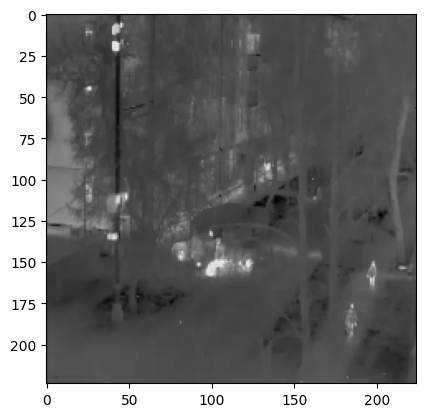

In [16]:
img_resized.shape
plt.imshow(img_resized)

num bboxes: 22
box size (pix): w:8 h:21
box size (pix): w:9 h:26
box size (pix): w:8 h:25
box size (pix): w:10 h:13
box size (pix): w:5 h:12
box size (pix): w:10 h:29
box size (pix): w:9 h:22
box size (pix): w:4 h:13
box size (pix): w:2 h:5
box size (pix): w:6 h:11
box size (pix): w:3 h:7
box size (pix): w:2 h:13
box size (pix): w:11 h:25
box size (pix): w:3 h:5
box size (pix): w:8 h:23
box size (pix): w:8 h:20
box size (pix): w:8 h:21
box size (pix): w:4 h:14
box size (pix): w:3 h:15
box size (pix): w:3 h:4
box size (pix): w:2 h:19
box size (pix): w:6 h:5


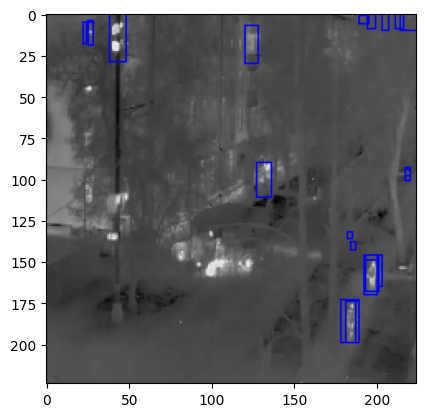

In [17]:
img_draw = img_resized.copy()
scores = outputs[2][0]
bboxes = outputs[1][0][scores > 0.01]
print(f'num bboxes: {len(bboxes)}')
for bbox in bboxes:
    print(f'box size (pix): w:{round(bbox[2] - bbox[0])} h:{round(bbox[3]-bbox[1])}')
    img_draw = cv2.rectangle(img_draw, (int(bbox[2]), int(bbox[3])), (int(bbox[0]), int(bbox[1])),  (0,0,255), 1)
plt.imshow(img_draw);

In [19]:
bboxes = outputs[1][0][scores > 0.1]

In [20]:
bboxes

array([[193.10086, 146.90099, 200.9451 , 168.33966],
       [178.90091, 173.88806, 187.40915, 199.58713],
       [181.06897, 174.63287, 189.23181, 199.3391 ]], dtype=float32)

In [ ]:
r_targets = []
for box in targets:
    r_targets.append(
        [
            round(box[0]*224/640),
            round(box[1]*224/480),
            round(box[2]*224/640),
            round(box[3]*224/480),
        ]
    )
r_targets

[[187, 153, 8, 22], [216, 138, 6, 19]]

box size (pix): w:8 h:22


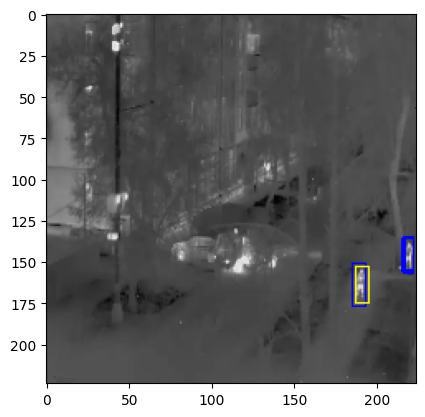

In [ ]:
r_targets_corners = [[187, 153,  195,  175,],[216, 138, 222,  157]]
for bbox in r_targets_corners :
    print(f'box size (pix): w:{round(bbox[2] - bbox[0])} h:{round(bbox[3]-bbox[1])}')
    img_draw = cv2.rectangle(img_draw, (int(bbox[2]), int(bbox[3])), (int(bbox[0]), int(bbox[1])),  (255,255,0), 1)
    break
plt.imshow(img_draw);